In [92]:
""" This notebook computes Figures 1-3 """
import numpy as np
import matplotlib.pyplot as plt
from scipy  import optimize

In [93]:
def U_gr(nu,r):
    """ Power utility minus its value at zero
    """
    # r: the array of the risky asset returns
    z=((1+nu*(r-1))/np.fmax(r,1))**alpha-(1/np.fmax(r,1))**alpha
    return np.mean(z)

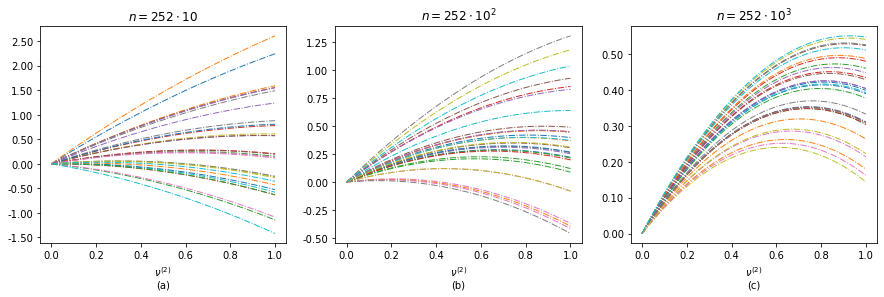

In [100]:
import matplotlib as mpl
alpha=0.2
# number of days
N0=252*10
N1=252*10**2
N2=252*10**3
# arrays for the returns of the risky asset
r0=np.ones(N0)
r1=np.ones(N1)
r2=np.ones(N2)
# Parameters of the discrete Black-Scholes model
mu=0.15
sigma=0.45
# nummber of weignt points \nu^{(2)} on the x-axis
n_points=100
nu=np.linspace(0,1,n_points)
# array for linearly transformed graphs of the empirical utility function 
gr=np.zeros(n_points)
# number of realizations
n_experiments=30
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# graphs in Fig.1(a)
for s in range(n_experiments):
    np.random.seed(42+s)
    r0=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=N0)
    for i in range(n_points):
        gr[i]=(U_gr(nu[i],r0)-U_gr(0,r0))*10**4
    axes[0].plot(nu,gr,linewidth=1, linestyle = '-.')
axes[0].set_xlabel(r'$\nu^{(2)}$'+'\n(a)')
axes[0].set_title(r'$n=252\cdot 10$')
axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
# graphs in Fig.1(b)
for s in range(n_experiments):
    np.random.seed(42+s)
    r1=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=N1)
    for i in range(n_points):
        gr[i]=(U_gr(nu[i],r1)-U_gr(0,r1))*10**4
    axes[1].plot(nu,gr,linewidth=1, linestyle = '-.')
axes[1].set_xlabel(r'$\nu^{(2)}$'+'\n(b)')
axes[1].set_title(r'$n=252\cdot 10^2$')
axes[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
# graphs in Fig.1(c)
for s in range(n_experiments):
    np.random.seed(42+s)
    r2=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=N2)
    for i in range(n_points):
        gr[i]=(U_gr(nu[i],r2)-U_gr(0,r2))*10**4
    axes[2].plot(nu,gr,linewidth=1, linestyle = '-.')
axes[2].set_xlabel(r'$\nu^{(2)}$'+'\n(c)')
axes[2].set_title(r'$n=252\cdot 10^3$')
axes[2].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
fig.savefig('empirical_utilities', dpi=400, bbox_inches='tight')

In [101]:
# This cell computes optimal weights of risky asset for 3 variants of artificial historical prices: 10 years (N0),  100 years (N1),  1000 years (N2)
# In each case n_samples realizations are considered
n_samples=200
V0=np.zeros((n_samples,n_points))
V1=np.zeros((n_samples,n_points))
V2=np.zeros((n_samples,n_points))
U_opt_0=np.zeros(n_samples)
U_opt_1=np.zeros(n_samples)
U_opt_2=np.zeros(n_samples)
nu_opt_0=np.zeros(n_samples)
nu_opt_1=np.zeros(n_samples)
nu_opt_2=np.zeros(n_samples)
# construction of empirical utilities
for sample in range(n_samples):
    # 10 years history
    np.random.seed(2552+sample)
    N0=252*10
    r0=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=N0)
    for i in range(n_points):
        V0[sample,i]=U_gr(nu[i],r0)*10**4
    # 100 years history
    N1=252*100
    r1=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=N1)
    for i in range(n_points):
        V1[sample,i]=U_gr(nu[i],r1)*10**4
    # 1000 years history
    N2=252*1000    
    r2=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=N2)    
    for i in range(n_points):
        V2[sample,i]=U_gr(nu[i],r2)*10**4
# optimal weights and their averages        
nu_opt_0=np.argmax(V0,axis=1)/(n_points-1)
mean_0=np.mean(np.max(V0,axis=1)) 
nu_opt_1=np.argmax(V1,axis=1)/(n_points-1)
mean_1=np.mean(np.max(V1,axis=1))
nu_opt_2=np.argmax(V2,axis=1)/(n_points-1)
mean_2=np.mean(np.max(V2,axis=1))

In [102]:
# A very large sample for the evaluation of the true utility
N=10**7
r=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=N)
# Evaluation of true utilities of optimal portfolio weights
for i in range(n_samples):
    U_opt_0[i]=U_gr(nu_opt_0[i],r)*10**4
    U_opt_1[i]=U_gr(nu_opt_1[i],r)*10**4
    U_opt_2[i]=U_gr(nu_opt_2[i],r)*10**4

In [103]:
# Some statistical characteristics of the true utilities
print(np.mean(U_opt_0),np.median(U_opt_0),np.percentile(U_opt_0,20),np.percentile(U_opt_0,10))
print(np.mean(U_opt_1),np.median(U_opt_1),np.percentile(U_opt_1,20),np.percentile(U_opt_1,10))
print(np.mean(U_opt_2),np.median(U_opt_2),np.percentile(U_opt_2,20),np.percentile(U_opt_2,10))

0.28330331081371124 0.35967754653223527 0.15909111385704958 0.0
0.360968533648279 0.3675919941524585 0.35967754653223527 0.3376829139957034
0.38556757373955786 0.38829465907974503 0.38294578422702136 0.3780545285789418


In [104]:
# Evaluation of the true utility of the portfolio weights taken from the grid
for i in range(n_points):
    gr[i]=U_gr(nu[i],r)*10**4

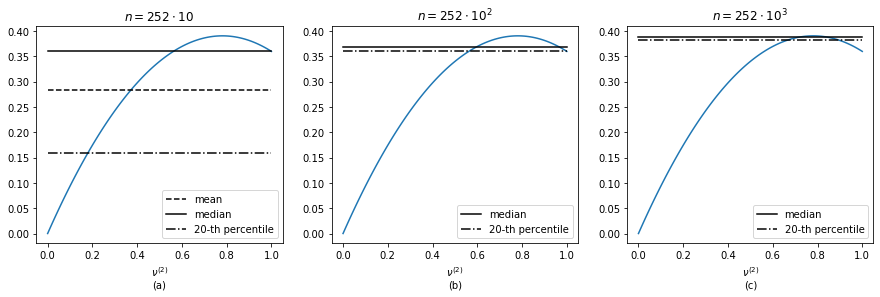

In [105]:
# This cell shows the graphs of the evaluated true utilities for 3 variants of artificial price histories, and also some of their statitstical characteristics
val_mean=np.zeros(n_points)
val_median=np.zeros(n_points)
val_percentile_20=np.zeros(n_points)
val_percentile_10=np.zeros(n_points)
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# 10 years
axes[0].plot(nu,gr)
val_mean[:]=np.mean(U_opt_0)
val_median[:]=np.median(U_opt_0)
val_percentile_20[:]=np.percentile(U_opt_0,20)
val_percentile_10[:]=np.percentile(U_opt_0,10)
axes[0].plot(nu,val_mean,color='black',label='mean',linestyle='--')
axes[0].plot(nu,val_median,color='black',label='median')
axes[0].plot(nu,val_percentile_20,color='black',label='20-th percentile',linestyle='-.')
axes[0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
axes[0].set_xlabel(r'$\nu^{(2)}$'+'\n(a)')
axes[0].set_title(r'$n=252\cdot 10$')
axes[0].legend()
# 100 years
axes[1].plot(nu,gr)
val_mean[:]=np.mean(U_opt_1)
val_median[:]=np.median(U_opt_1)
val_percentile_20[:]=np.percentile(U_opt_1,20)
val_percentile_10[:]=np.percentile(U_opt_1,10)
#axes[1].plot(nu,val_mean,color='red',label='mean',linestyle='-')
axes[1].plot(nu,val_median,color='black',label='median')
axes[1].plot(nu,val_percentile_20,color='black',label='20-th percentile',linestyle='-.')
axes[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
axes[1].set_xlabel(r'$\nu^{(2)}$'+'\n(b)')
axes[1].set_title(r'$n=252\cdot 10^2$')
axes[1].legend()
# 1000 years
axes[2].plot(nu,gr)
val_mean[:]=np.mean(U_opt_2)
val_median[:]=np.median(U_opt_2)
val_percentile_20[:]=np.percentile(U_opt_2,20)
axes[2].plot(nu,val_median,color='black',label='median')
axes[2].plot(nu,val_percentile_20,color='black',label='20-th percentile',linestyle='-.')
axes[2].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
axes[2].set_xlabel(r'$\nu^{(2)}$'+'\n(c)')
axes[2].set_title(r'$n=252\cdot 10^3$')
axes[2].legend()
fig.savefig('true_utilities.png', dpi=400, bbox_inches='tight',cmap='gray')

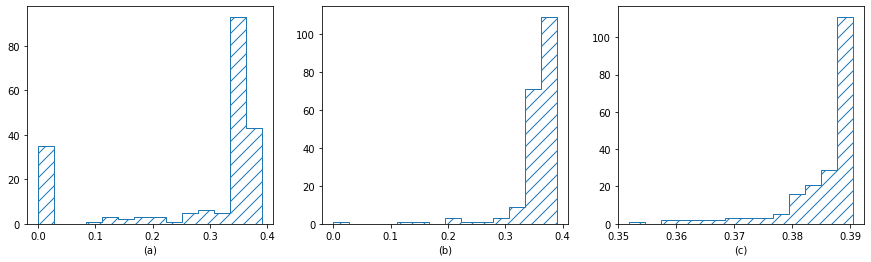

In [106]:
# Histograms of the true utilities for 3 variants of price histories
fig, axes = plt.subplots(1, 3, figsize=(15,4))
axes[0].hist(U_opt_0,bins=14,histtype='step',hatch='//') 
axes[0].set_xlabel('(a)')
axes[1].hist(U_opt_1,bins=14,histtype='step',hatch='//')
axes[1].set_xlabel('(b)')
axes[2].hist(U_opt_2,bins=14,histtype='step',hatch='//')
axes[2].set_xlabel('(c)')
fig.savefig('true_utilities_hist.png', dpi=400, bbox_inches='tight')